## Dependencies and Data

In [1]:
#Dependencies
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
csv_path_arrest = "police_pedestrian_stops_and_vehicle_stops.csv"
census_data = "census_neighborhood_demographics_2010.csv"
neighborhood_regions = 'neighborhood_regions.csv'

## Arrest/Citations Data

In [2]:
df_arrest = pd.read_csv(csv_path_arrest)
census_df = pd.read_csv(census_data)
census_df.head()

,NBHD_ID,NBRHD_NAME,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVEAM_2010,ASIAN_2010,HAWPACIS_2010,OTHER_2010,...,RENTED_AGE_25_TO_34,RENTED_AGE_35_TO_44,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length,SHAPE_Area
0,32,Hampden,17547.0,2505.0,11750.0,1963.0,64.0,726.0,20.0,38.0,...,1363.0,791.0,700.0,304.0,253.0,285.0,200.0,229.0,0.200466,0.000768
1,3,Baker,4879.0,1664.0,2854.0,144.0,43.0,52.0,10.0,7.0,...,486.0,235.0,231.0,113.0,64.0,82.0,23.0,7.0,0.101767,0.000406
2,70,Washington Park,6905.0,295.0,6356.0,28.0,9.0,119.0,3.0,13.0,...,329.0,132.0,70.0,31.0,36.0,27.0,6.0,21.0,0.090445,0.000411
3,13,Cherry Creek,5589.0,332.0,4896.0,79.0,17.0,168.0,4.0,3.0,...,521.0,261.0,211.0,79.0,92.0,161.0,224.0,207.0,0.063923,0.000228
4,22,Country Club,3001.0,94.0,2740.0,20.0,8.0,77.0,1.0,5.0,...,90.0,55.0,34.0,14.0,17.0,9.0,4.0,2.0,0.052865,0.000177


In [3]:
neighborhood_df = pd.read_csv(neighborhood_regions)
region_arrests = pd.merge(df_arrest, neighborhood_df, left_on="NEIGHBORHOOD_NAME", right_on="NEIGHBORHOOD")
region_arrests.head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,NEIGHBORHOOD,DENVER_REGION,Unnamed: 2,Unnamed: 3
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,Marston,Southwest,NaN,NaN
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,Marston,Southwest,NaN,NaN
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,Marston,Southwest,NaN,NaN
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,Marston,Southwest,NaN,NaN
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,Marston,Southwest,NaN,NaN


In [4]:
#Convert arrest/citation date and time to date and time format
df_arrest['TIME_PHONEPICKUP'] = pd.to_datetime(df_arrest['TIME_PHONEPICKUP'])

#Create columns for year, month, and hour of arrest/citation
df_arrest['YEAR'], df_arrest['MONTH'], df_arrest['HOUR'] = df_arrest['TIME_PHONEPICKUP'].dt.year, df_arrest['TIME_PHONEPICKUP'].dt.month, df_arrest['TIME_PHONEPICKUP'].dt.hour 
df_arrest.head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,YEAR,MONTH,HOUR
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,11,0
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,4,0
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,7,0
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,7,4
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2015,11,0


In [5]:
df_arrest_clean = df_arrest.loc[:, ["CALL_DISPOSITION", "CALL_CLASS", "NEIGHBORHOOD_NAME", "ADDRESS", "YEAR", "MONTH", "HOUR"]]
df_arrest_clean.head()

,CALL_DISPOSITION,CALL_CLASS,NEIGHBORHOOD_NAME,ADDRESS,YEAR,MONTH,HOUR
0,K - Street Check Completed,2,Marston,8500 W CRESTLINE AVE,2012,11,0
1,Arrest Made,2,Marston,8500 W CRESTLINE AVE,2012,4,0
2,Party Advised,2,Marston,8500 W CRESTLINE AVE,2012,7,0
3,Party Advised,2,Marston,8500 W CRESTLINE AVE,2012,7,4
4,Party Advised,2,Marston,8500 W Crestline Ave,2015,11,0


In [6]:
call_dispo = df_arrest_clean.groupby('CALL_DISPOSITION')
neighbor_disp = call_dispo['CALL_CLASS'].count()

neighbor_disp.head(65)

CALL_DISPOSITION
1 - Alarm RP On Scene               527
1 - Alarm RP On Scene,2 - Alar        1
1 - Alarm RP On Scene,3 - Alar        1
1 - Alarm RP On Scene,Arrest M        7
1 - Alarm RP On Scene,Back Up         3
1 - Alarm RP On Scene,Detox Va        1
1 - Alarm RP On Scene,File Onl       11
1 - Alarm RP On Scene,GOA             1
1 - Alarm RP On Scene,In Servi       36
1 - Alarm RP On Scene,K - Stre       19
1 - Alarm RP On Scene,L - Clea        1
1 - Alarm RP On Scene,No Polic        3
1 - Alarm RP On Scene,O - Veh         1
1 - Alarm RP On Scene,Party Ad      188
1 - Alarm RP On Scene,Quit           16
1 - Alarm RP On Scene,Report M        6
1 - Alarm RP On Scene,T - Cita       54
1 - Alarm RP On Scene,UTL / Un        5
1 - Alarm RP On Scene,Vehicle         2
1 - Alarm RP On Scene,Warning        18
2 - Alarm False                     213
2 - Alarm False,Detox Van             1
2 - Alarm False,Party Advised         1
2 - Alarm False,Quit                  1
3 - Alarm Good         

In [7]:
rdfa = df_arrest_clean.loc[df_arrest_clean["CALL_DISPOSITION"] == "Arrest Made"]
rdfa = rdfa.drop_duplicates()
rdfa

,CALL_DISPOSITION,CALL_CLASS,NEIGHBORHOOD_NAME,ADDRESS,YEAR,MONTH,HOUR
1,Arrest Made,2,Marston,8500 W CRESTLINE AVE,2012,4,0
36,Arrest Made,2,Marston,8500 W CRESTLINE AVE,2012,4,1
89,Arrest Made,2,Southmoor Park,6950 E Chenango Ave,2017,11,21
102,Arrest Made,2,Southmoor Park,4885 S Quebec St,2017,2,17
104,Arrest Made,2,Southmoor Park,4885 S Quebec St,2017,3,9
107,Arrest Made,2,Southmoor Park,4885 S Quebec St,2017,3,1
108,Arrest Made,2,Southmoor Park,4885 S Quebec St,2017,10,3
110,Arrest Made,2,None,5000-Blk S Federal Blvd,2012,1,13
111,Arrest Made,2,Marston,4900-BLK S GARLAND ST,2011,8,23
123,Arrest Made,2,Marston,W LAYTON AVE / S WADSWORTH BLVD,2011,12,23


In [8]:
total_arrest = rdfa['CALL_CLASS'].count()
total_arrest

87207

In [9]:
arrests_year = rdfa.groupby('YEAR')['CALL_CLASS'].count().reset_index()
arrests_year = arrests_year.loc[:, ["YEAR", 'CALL_CLASS']]
arrests_year = arrests_year.rename(columns={'CALL_CLASS': 'TOTAL_ARRESTS'})
arrests_year

,YEAR,TOTAL_ARRESTS
0,2010,13
1,2011,9636
2,2012,12333
3,2013,11284
4,2014,11792
5,2015,11003
6,2016,11789
7,2017,12790
8,2018,6567


In [10]:
neigh_danger = rdfa.groupby(["NEIGHBORHOOD_NAME"])
neigh_danger = neigh_danger['CALL_CLASS'].count()
neigh_danger

NEIGHBORHOOD_NAME
Athmar Park                     1369
Auraria                          347
Baker                           2221
Barnum                          2516
Barnum West                      655
Bear Valley                      129
Belcaro                          154
Berkeley                         923
CBD                             2726
Capitol Hill                    1653
Chaffee Park                     420
Cheesman Park                    423
Cherry Creek                     356
City Park                        734
City Park West                  1320
Civic Center                    2053
Clayton                          748
Cole                            2006
College View - South Platte      908
Congress Park                    358
Cory - Merrill                   275
Country Club                     156
DIA                               77
East Colfax                     6912
Elyria Swansea                  1823
Five Points                     6174
Fort Logan          

In [11]:
rdfc = df_arrest_clean.loc[df_arrest_clean["CALL_DISPOSITION"] == "T - Citation Issued"]
rdfc = rdfc.drop_duplicates()
total_citation = rdfc['CALL_CLASS'].count()
citations = rdfc.groupby(["NEIGHBORHOOD_NAME"])
neigh_citations = citations['CALL_CLASS'].count()
neigh_citations

NEIGHBORHOOD_NAME
Athmar Park                     2410
Auraria                          560
Baker                           4464
Barnum                          4301
Barnum West                     1211
Bear Valley                      560
Belcaro                          911
Berkeley                        1549
CBD                             1893
Capitol Hill                    1537
Chaffee Park                     516
Cheesman Park                    388
Cherry Creek                     825
City Park                        956
City Park West                  1134
Civic Center                    1331
Clayton                          692
Cole                             978
College View - South Platte     1282
Congress Park                   1111
Cory - Merrill                  1173
Country Club                     346
DIA                              409
East Colfax                     2390
Elyria Swansea                  2320
Five Points                     3781
Fort Logan          

In [12]:
citations_year = rdfc.groupby('YEAR')['CALL_CLASS'].count().reset_index()
citations_year = citations_year.loc[:, ["YEAR", 'CALL_CLASS']]
citations_year = citations_year.rename(columns={'CALL_CLASS': 'TOTAL_CITATIONS'})
citations_year

,YEAR,TOTAL_CITATIONS
0,2010,13
1,2011,11141
2,2012,13544
3,2013,11919
4,2014,14687
5,2015,13103
6,2016,19452
7,2017,22050
8,2018,9042


In [13]:
total_citations = rdfc['CALL_CLASS'].count()
total_citations

114951

In [14]:
arrests_by_neighborhood = rdfa.groupby(['NEIGHBORHOOD_NAME']).CALL_CLASS.count().reset_index()
arrests_by_neighborhood = arrests_by_neighborhood.rename(columns={'CALL_CLASS': 'TOTAL_ARRESTS'})
arrests_by_neighborhood = pd.merge(arrests_by_neighborhood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_NAME', right_on='NBRHD_NAME')
arrests_by_neighborhood = arrests_by_neighborhood.drop('NBRHD_NAME', axis=1)
arrests_by_neighborhood['ARRESTS_PER_PERSON'] = arrests_by_neighborhood['TOTAL_ARRESTS']/arrests_by_neighborhood['POPULATION_2010']
arrests_by_neighborhood.head()

,NEIGHBORHOOD_NAME,TOTAL_ARRESTS,POPULATION_2010,ARRESTS_PER_PERSON
0,Athmar Park,1369,8898.0,0.153855
1,Auraria,347,705.0,0.492199
2,Baker,2221,4879.0,0.455216
3,Barnum,2516,6111.0,0.411717
4,Barnum West,655,5376.0,0.121838


In [15]:
sorted_arr_neighborhood = arrests_by_neighborhood.sort_values(by='TOTAL_ARRESTS', ascending=False)
sorted_arr_neighborhood.head(10)

,NEIGHBORHOOD_NAME,TOTAL_ARRESTS,POPULATION_2010,ARRESTS_PER_PERSON
22,East Colfax,6912,10191.0,0.678246
24,Five Points,6174,12712.0,0.485683
42,Montbello,3586,30348.0,0.118163
73,Westwood,3547,15486.0,0.229046
71,West Colfax,2842,9740.0,0.291786
38,Lincoln Park,2767,6119.0,0.452198
8,CBD,2726,3648.0,0.747259
44,North Capitol Hill,2650,5823.0,0.455092
3,Barnum,2516,6111.0,0.411717
57,Stapleton,2274,13948.0,0.163034


In [16]:
citations_by_neighborhood = rdfc.groupby(['NEIGHBORHOOD_NAME']).CALL_CLASS.count().reset_index()
citations_by_neighborhood = citations_by_neighborhood.rename(columns={'CALL_CLASS': 'TOTAL_CITATIONS'})
citations_by_neighborhood = pd.merge(citations_by_neighborhood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_NAME', right_on='NBRHD_NAME')
citations_by_neighborhood = citations_by_neighborhood.drop('NBRHD_NAME', axis=1)
citations_by_neighborhood['CITATIONS_PER_PERSON'] = citations_by_neighborhood['TOTAL_CITATIONS']/citations_by_neighborhood['POPULATION_2010']
citations_by_neighborhood.head()

,NEIGHBORHOOD_NAME,TOTAL_CITATIONS,POPULATION_2010,CITATIONS_PER_PERSON
0,Athmar Park,2410,8898.0,0.270847
1,Auraria,560,705.0,0.794326
2,Baker,4464,4879.0,0.914942
3,Barnum,4301,6111.0,0.703813
4,Barnum West,1211,5376.0,0.225260


## Traffic Accidents Data

In [17]:
accident_df = pd.read_csv("traffic_accidents.csv")

#Convert to date and time format and pull out year, month, hour of accident
accident_df['FIRST_OCCURENCE_DATE'] = pd.to_datetime(accident_df['FIRST_OCCURENCE_DATE'])
accident_df['YEAR'], accident_df['MONTH'], accident_df['HOUR'] = accident_df['FIRST_OCCURENCE_DATE'].dt.year, accident_df['FIRST_OCCURENCE_DATE'].dt.month, accident_df['FIRST_OCCURENCE_DATE'].dt.hour 

#Strip whitespace on end of Offense Category ID
accident_df['OFFENSE_CATEGORY_ID'] = accident_df['OFFENSE_CATEGORY_ID'].apply(lambda x: x.strip())
accident_df.head()

C:\Users\Bass\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURENCE_DATE,LAST_OCCURENCE_DATE,REPORTED_DATE,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,YEAR,MONTH,HOUR
0,200,2.012513e+09,201251274154010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-11-02 18:20:00,None,2012-11-03 08:52:00,...,-105.052849,39.682112,4,421,Harvey Park,0,0,2012,11,18
1,201,2.012516e+09,201251634354410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-11-05 14:16:00,None,2012-11-05 15:12:00,...,-104.884786,39.653067,3,323,Hampden South,0,0,2012,11,14
2,203,2.012141e+09,201214081754010,5401,0,TRAF-HIT & RUN,TRAF - ACCIDENT - HIT & RUN,2012-04-02 17:00:00,None,2012-04-06 14:37:00,...,-104.986886,39.737147,6,623,Capitol Hill,0,0,2012,4,17
3,204,2.012253e+09,201225335454410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-06-11 17:05:00,None,2012-06-11 17:43:00,...,-104.979833,39.703898,3,311,Washington Park West,0,0,2012,6,17
4,206,2.012119e+09,201211878854410,5441,0,TRF-ACCIDENT,TRAF - ACCIDENT,2012-03-23 11:01:00,None,2012-03-23 11:10:00.000001,...,-105.014162,39.740439,1,121,Lincoln Park,0,0,2012,3,11


In [18]:
accidents_by_hood = accident_df.groupby(['NEIGHBORHOOD_ID']).OFFENSE_ID.count().reset_index()
accidents_by_hood = accidents_by_hood.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_hood = pd.merge(accidents_by_hood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_ID', right_on='NBRHD_NAME')
accidents_by_hood = accidents_by_hood.drop('NBRHD_NAME', axis=1)
accidents_by_hood['ACCIDENTS_PER_PERSON'] = accidents_by_hood['TOTAL_ACCIDENTS']/accidents_by_hood['POPULATION_2010']
accidents_by_hood.head()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON
0,Athmar Park,1719,8898.0,0.193189
1,Auraria,1285,705.0,1.822695
2,Baker,7221,4879.0,1.480016
3,Barnum,1812,6111.0,0.296514
4,Barnum West,1003,5376.0,0.186570


In [19]:
#Total Number of Accidents
total_accident_count = accidents_by_hood.TOTAL_ACCIDENTS.sum()
total_accident_count

144933

In [20]:
#Merge with neighborhood dataframe to bring in Denver Region
accidents_by_hood = pd.merge(accidents_by_hood, neighborhood_df, left_on="NEIGHBORHOOD_ID", right_on="NEIGHBORHOOD")
accidents_by_hood.head()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,NEIGHBORHOOD,DENVER_REGION,Unnamed: 2,Unnamed: 3
0,Athmar Park,1719,8898.0,0.193189,Athmar Park,West,NaN,NaN
1,Auraria,1285,705.0,1.822695,Auraria,Northwest,NaN,NaN
2,Baker,7221,4879.0,1.480016,Baker,Central,NaN,NaN
3,Barnum,1812,6111.0,0.296514,Barnum,West,NaN,NaN
4,Barnum West,1003,5376.0,0.186570,Barnum West,West,NaN,NaN


In [21]:
#Sort dataframe by Number of Accidents Per Person
sorted_accidents_by_hood = accidents_by_hood.sort_values(by='ACCIDENTS_PER_PERSON', ascending=False)
sorted_accidents_by_hood.head(10)

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,NEIGHBORHOOD,DENVER_REGION,Unnamed: 2,Unnamed: 3
21,DIA,2156,1165.0,1.850644,DIA,Northeast,NaN,NaN
1,Auraria,1285,705.0,1.822695,Auraria,Northwest,NaN,NaN
15,Civic Center,2372,1577.0,1.504122,Civic Center,Central,NaN,NaN
2,Baker,7221,4879.0,1.480016,Baker,Central,NaN,NaN
26,Globeville,3668,3687.0,0.994847,Globeville,North,NaN,NaN
8,CBD,3080,3648.0,0.844298,CBD,Central,NaN,NaN
47,Overland,1835,2218.0,0.827322,Overland,South,NaN,NaN
36,Jefferson Park,2063,2552.0,0.808386,Jefferson Park,Northwest,NaN,NaN
38,Lincoln Park,4353,6119.0,0.711391,Lincoln Park,Central,NaN,NaN
58,Sun Valley,1028,1448.0,0.709945,Sun Valley,West,NaN,NaN


In [22]:
#Bring in house value data
house_values_df = pd.read_csv("Neighborhood_House_Value.csv")
accidents_by_hood = pd.merge(accidents_by_hood, house_values_df[['Neighborhood', 'House Value']], left_on="NEIGHBORHOOD_ID", right_on="Neighborhood")
accidents_by_hood = accidents_by_hood.drop('Neighborhood', axis=1)
accidents_by_hood.head()

,NEIGHBORHOOD_ID,TOTAL_ACCIDENTS,POPULATION_2010,ACCIDENTS_PER_PERSON,NEIGHBORHOOD,DENVER_REGION,Unnamed: 2,Unnamed: 3,House Value
0,Athmar Park,1719,8898.0,0.193189,Athmar Park,West,NaN,NaN,181000.0
1,Auraria,1285,705.0,1.822695,Auraria,Northwest,NaN,NaN,NaN
2,Baker,7221,4879.0,1.480016,Baker,Central,NaN,NaN,337500.0
3,Barnum,1812,6111.0,0.296514,Barnum,West,NaN,NaN,157300.0
4,Barnum West,1003,5376.0,0.186570,Barnum West,West,NaN,NaN,172900.0


In [23]:
accidents_by_hood.groupby('DENVER_REGION')['TOTAL_ACCIDENTS'].sum().sort_values(ascending=False)

DENVER_REGION
Central      39471
Northeast    16894
North        16122
East         15917
West         15750
Northwest    14004
South        12010
Southeast     9950
Southwest     4815
Name: TOTAL_ACCIDENTS, dtype: int64

In [24]:
#Number of Accidents By Type
offense_df = accident_df.groupby('OFFENSE_CATEGORY_ID')['OFFENSE_ID'].count().reset_index()
offense_df = offense_df.rename(columns={'OFFENSE_ID': 'ACCIDENT_COUNT'})
offense_df['%_OF_TOTAL_ACCIDENTS'] = (offense_df['ACCIDENT_COUNT']/total_accident_count*100).map('{:.2f}%'.format)
offense_df = offense_df.sort_values(by='ACCIDENT_COUNT', ascending=False)
offense_df.head()

,OFFENSE_CATEGORY_ID,ACCIDENT_COUNT,%_OF_TOTAL_ACCIDENTS
0,TRAF - ACCIDENT,100870,69.60%
3,TRAF - ACCIDENT - HIT & RUN,39472,27.23%
1,TRAF - ACCIDENT - DUI/DUID,4658,3.21%
5,TRAF - ACCIDENT - SBI,2013,1.39%
4,TRAF - ACCIDENT - POLICE,1445,1.00%


In [25]:
#Bike Accidents
bike_accs_df = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = bike_accs_df['YEAR'].max() - bike_accs_df['YEAR'].min()
bike_accs_df = bike_accs_df.groupby('NEIGHBORHOOD_ID')['BICYCLE_IND'].sum().reset_index()
bike_accs_df['AVG_ACCS_PER_YEAR'] = bike_accs_df['BICYCLE_IND']/num_years
bike_accs_df = bike_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
bike_accs_df.head(10)

,NEIGHBORHOOD_ID,BICYCLE_IND,AVG_ACCS_PER_YEAR
25,Five Points,130,26.0
9,Capitol Hill,109,21.8
8,CBD,95,19.0
63,Union Station,92,18.4
47,North Capitol Hill,88,17.6
15,Civic Center,76,15.2
40,Lincoln Park,73,14.6
11,Cheesman Park,62,12.4
35,Highland,61,12.2
59,Speer,58,11.6


In [26]:
#Pedestrian Accidents
ped_accs_df = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = ped_accs_df['YEAR'].max() - ped_accs_df['YEAR'].min()
ped_accs_df = ped_accs_df.groupby('NEIGHBORHOOD_ID')['PEDESTRIAN_IND'].sum().reset_index()
ped_accs_df['AVG_ACCS_PER_YEAR'] = ped_accs_df['PEDESTRIAN_IND']/num_years
ped_accs_df = ped_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
ped_accs_df.head(10)

,NEIGHBORHOOD_ID,PEDESTRIAN_IND,AVG_ACCS_PER_YEAR
9,Capitol Hill,203,40.6
63,Union Station,176,35.2
25,Five Points,159,31.8
8,CBD,129,25.8
15,Civic Center,106,21.2
76,Westwood,103,20.6
2,Baker,99,19.8
44,Montbello,89,17.8
11,Cheesman Park,86,17.2
60,Stapleton,86,17.2


In [27]:
dui_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - DUI/DUID'
dui_df = accident_df[dui_mask]
dui_df = dui_df.loc[dui_df['YEAR'] < 2018]
num_years = dui_df['YEAR'].max() - dui_df['YEAR'].min()
dui_df = dui_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
dui_df = dui_df.rename(columns={'OFFENSE_ID': 'DUI_COUNT'})
dui_df['AVG_DUI_YR'] = dui_df['DUI_COUNT']/num_years
dui_df = dui_df.sort_values(by='DUI_COUNT', ascending=False)
dui_df.head(10)

,NEIGHBORHOOD_ID,DUI_COUNT,AVG_DUI_YR
60,Stapleton,189,37.8
2,Baker,156,31.2
25,Five Points,151,30.2
9,Capitol Hill,151,30.2
40,Lincoln Park,140,28.0
28,Globeville,139,27.8
76,Westwood,130,26.0
44,Montbello,125,25.0
35,Highland,114,22.8
32,Hampden South,108,21.6


In [28]:
fatal_mask = accident_df['OFFENSE_CATEGORY_ID'] == 'TRAF - ACCIDENT - FATAL'
fatal_df = accident_df[fatal_mask]
fatal_df = fatal_df.loc[fatal_df['YEAR']<2018]
num_years = fatal_df['YEAR'].max() - fatal_df['YEAR'].min()
fatal_df = fatal_df.groupby('NEIGHBORHOOD_ID')['OFFENSE_ID'].count().reset_index()
fatal_df = fatal_df.rename(columns={'OFFENSE_ID': 'FATAL_COUNT'})
fatal_df['AVG_FATAL_YR'] = fatal_df['FATAL_COUNT']/num_years
fatal_df = fatal_df.sort_values(by='AVG_FATAL_YR', ascending=False)
fatal_df.head(10)

,NEIGHBORHOOD_ID,FATAL_COUNT,AVG_FATAL_YR
52,Stapleton,18,3.6
68,Westwood,11,2.2
38,Lincoln Park,11,2.2
0,Athmar Park,8,1.6
26,Gateway - Green Valley Ranch,8,1.6
27,Globeville,8,1.6
42,Montbello,8,1.6
23,Elyria Swansea,8,1.6
51,Speer,7,1.4
40,Mar Lee,7,1.4


## Time of Day Analysis

In [29]:
accidents_by_hour = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_hour['YEAR'].max() - accidents_by_hour['YEAR'].min()
accidents_by_hour = accidents_by_hour.groupby(['HOUR']).OFFENSE_ID.count().reset_index()
accidents_by_hour= accidents_by_hour.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_hour['AVG_ACC_PER_YEAR'] = accidents_by_hour['ACCIDENT_COUNT']/num_years
accidents_by_hour.head()

,HOUR,ACCIDENT_COUNT,AVG_ACC_PER_YEAR
0,0,2429,485.8
1,1,2408,481.6
2,2,2826,565.2
3,3,1180,236.0
4,4,885,177.0


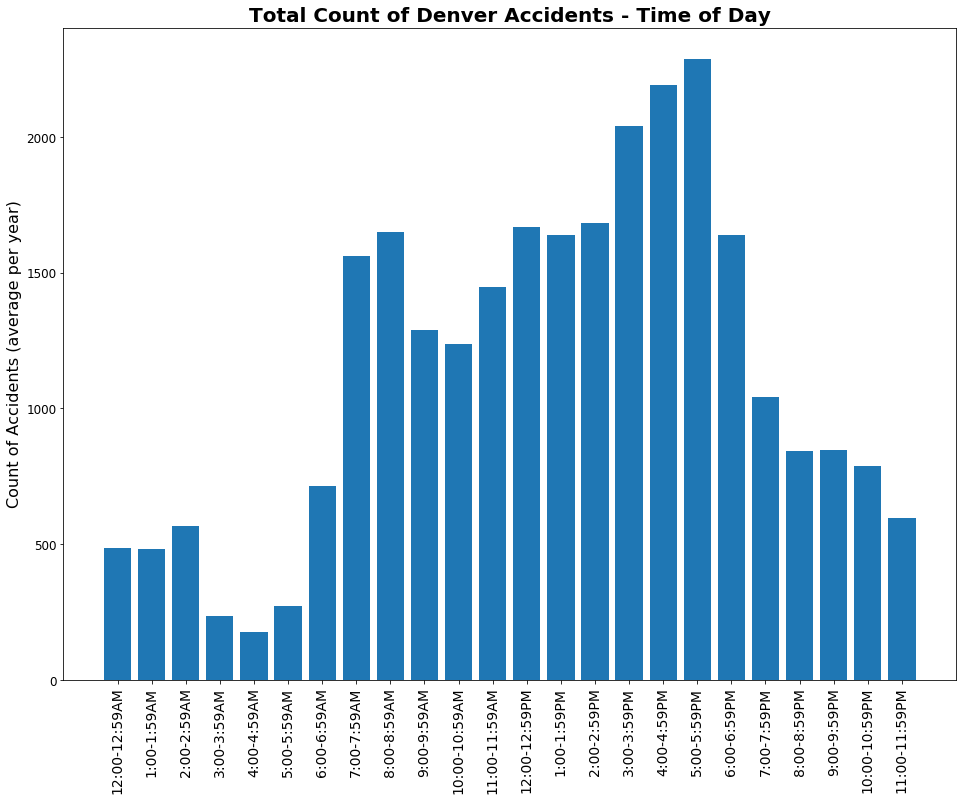

In [30]:
plt.figure(figsize=(16,12))
x_axis = accidents_by_hour.index
y_axis = accidents_by_hour['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_hour.index]

plt.title ('Total Count of Denver Accidents - Time of Day', fontsize=20, fontweight='semibold')
plt.ylabel('Count of Accidents (average per year)', fontsize=16)
x_labels = ['12:00-12:59AM', '1:00-1:59AM', '2:00-2:59AM', '3:00-3:59AM', '4:00-4:59AM', '5:00-5:59AM', '6:00-6:59AM', '7:00-7:59AM', '8:00-8:59AM',
            '9:00-9:59AM', '10:00-10:59AM', '11:00-11:59AM', '12:00-12:59PM', '1:00-1:59PM', '2:00-2:59PM', '3:00-3:59PM', '4:00-4:59PM', '5:00-5:59PM',
            '6:00-6:59PM', '7:00-7:59PM', '8:00-8:59PM', '9:00-9:59PM', '10:00-10:59PM', '11:00-11:59PM']           
plt.xticks(tick_locations, x_labels, rotation=90, fontsize=14)
plt.yticks(fontsize=12)

plt.savefig("Accidents_by_TOD.png")

plt.show()

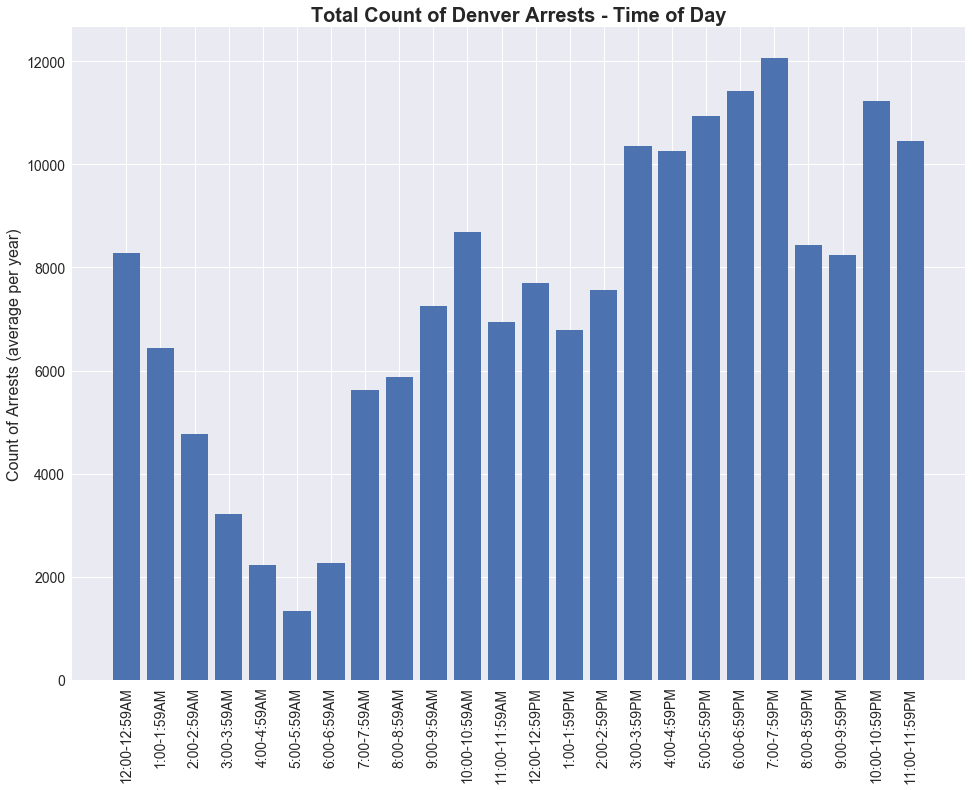

In [31]:
arrests_by_hour = df_arrest.loc[df_arrest['YEAR'] < 2018]#Get rid of 2018 data so as not to skew
arrests_by_hour = df_arrest.loc[df_arrest['YEAR'] > 2011]
num_years = df_arrest['YEAR'].max() - df_arrest['YEAR'].min()
arrests_by_hour = arrests_by_hour.groupby(['HOUR']).MASTER_INCIDENT_NUMBER.count().reset_index()
arrests_by_hour = arrests_by_hour.rename(columns={'MASTER_INCIDENT_NUMBER': "ARREST_COUNT"})
arrests_by_hour['AVG_ARR_PER_YEAR'] = arrests_by_hour['ARREST_COUNT']/num_years

sns.set()
plt.figure(figsize=(16,12))
x_axis = arrests_by_hour.index
y_axis = arrests_by_hour['AVG_ARR_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in arrests_by_hour.index]
#x_labels = accidents_by_hour.HOUR
x_labels = ['12:00-12:59AM', '1:00-1:59AM', '2:00-2:59AM', '3:00-3:59AM', '4:00-4:59AM', '5:00-5:59AM', '6:00-6:59AM', '7:00-7:59AM', '8:00-8:59AM',
            '9:00-9:59AM', '10:00-10:59AM', '11:00-11:59AM', '12:00-12:59PM', '1:00-1:59PM', '2:00-2:59PM', '3:00-3:59PM', '4:00-4:59PM', '5:00-5:59PM',
            '6:00-6:59PM', '7:00-7:59PM', '8:00-8:59PM', '9:00-9:59PM', '10:00-10:59PM', '11:00-11:59PM']           
plt.xticks(tick_locations, x_labels, rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.title ('Total Count of Denver Arrests - Time of Day', fontsize=20, fontweight='semibold')
plt.ylabel('Count of Arrests (average per year)', fontsize=16)
#plt.ylim(0, 3000)

plt.savefig("Arrests_by_TOD.png")

plt.show()

## Trends Over Time Analysis

In [32]:
citations_year = rdfc.groupby('YEAR')['CALL_CLASS'].count().reset_index()
citations_year = citations_year.loc[:, ["YEAR", 'CALL_CLASS']]
citations_year = citations_year.rename(columns={'CALL_CLASS': 'TOTAL_CITATIONS'})
citations_year = citations_year.loc[citations_year['YEAR'] < 2018]
citations_year = citations_year.loc[citations_year['YEAR'] > 2011]
citations_year

,YEAR,TOTAL_CITATIONS
2,2012,13544
3,2013,11919
4,2014,14687
5,2015,13103
6,2016,19452
7,2017,22050


In [33]:
accidents_by_year = accident_df.groupby('YEAR')['OFFENSE_ID'].count().reset_index()
accidents_by_year = accidents_by_year.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_year = accidents_by_year.loc[accidents_by_year['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
accidents_by_year

,YEAR,TOTAL_ACCIDENTS
0,2012,20560
1,2013,21182
2,2014,22444
3,2015,23842
4,2016,24254
5,2017,24616


In [34]:
arrests_year = rdfa.groupby('YEAR')['CALL_CLASS'].count().reset_index()
arrests_year = arrests_year.loc[:, ["YEAR", 'CALL_CLASS']]
arrests_year = arrests_year.rename(columns={'CALL_CLASS': 'TOTAL_ARRESTS'})
arrests_year = arrests_year.loc[arrests_year['YEAR'] < 2018]
arrests_year = arrests_year.loc[arrests_year['YEAR'] > 2011]
arrests_year

,YEAR,TOTAL_ARRESTS
2,2012,12333
3,2013,11284
4,2014,11792
5,2015,11003
6,2016,11789
7,2017,12790


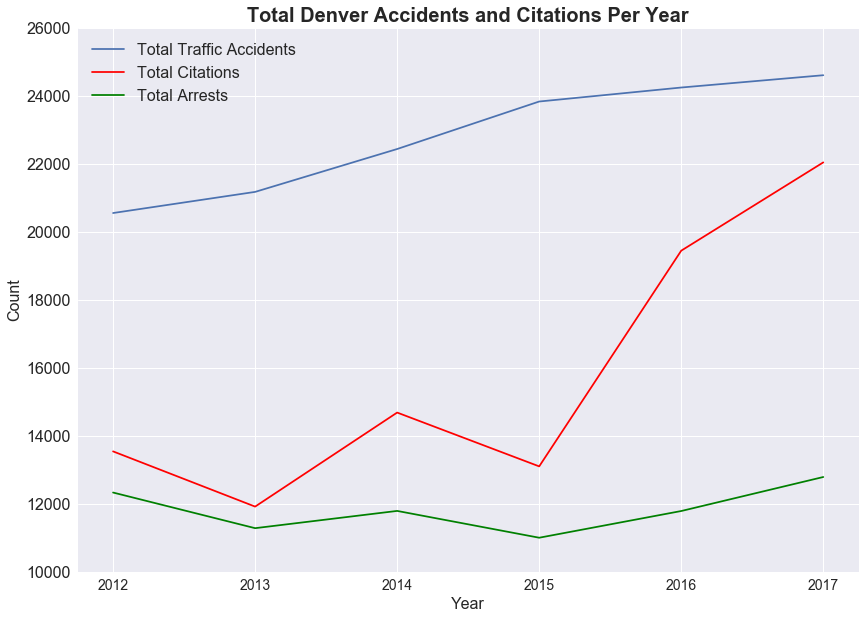

In [35]:
plt.figure(figsize=(14,10))

accidents_yr_plot = plt.plot(accidents_by_year['YEAR'], accidents_by_year['TOTAL_ACCIDENTS'], label='Total Traffic Accidents')
citations_yr_plot = plt.plot(citations_year['YEAR'], citations_year['TOTAL_CITATIONS'], c='red', label='Total Citations')
arrests_yr_plot = plt.plot(arrests_year['YEAR'], arrests_year['TOTAL_ARRESTS'], c='green', label='Total Arrests')

plt.title ('Total Denver Accidents and Citations Per Year', fontsize=20, fontweight='semibold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.ylim(10000, 26000)
plt.legend(loc="best", fontsize=16)

plt.savefig('accidents_citations_line_plot.png')

plt.show()



Neighborhood Arrest and Citation Analysis

In [40]:
citations_by_neighborhood  = pd.merge(citations_by_neighborhood , house_values_df[['Neighborhood', 'House Value']], left_on="NEIGHBORHOOD_NAME", right_on="Neighborhood")
citations_by_neighborhood  = citations_by_neighborhood .drop('Neighborhood', axis=1)
citations_by_neighborhood = pd.merge(citations_by_neighborhood, neighborhood_df, left_on="NEIGHBORHOOD_NAME", right_on="NEIGHBORHOOD")

arrests_by_neighborhood = pd.merge(arrests_by_neighborhood, house_values_df[['Neighborhood', 'House Value']], left_on="NEIGHBORHOOD_NAME", right_on="Neighborhood")
arrests_by_neighborhood = arrests_by_neighborhood.drop('Neighborhood', axis=1)
arrests_by_neighborhood = pd.merge(arrests_by_neighborhood, neighborhood_df, left_on="NEIGHBORHOOD_NAME", right_on="NEIGHBORHOOD")

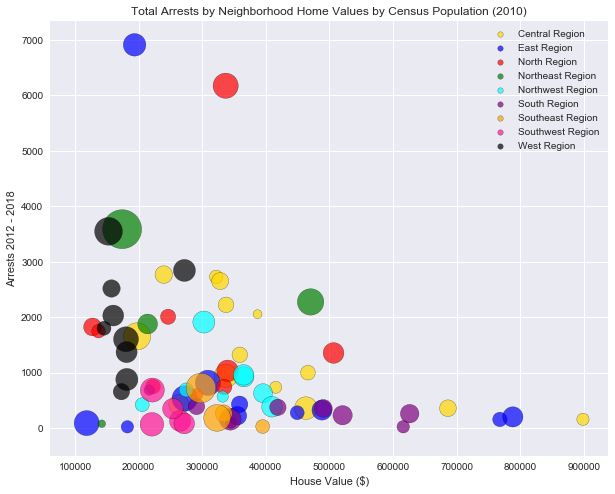

In [41]:
central_data  = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'Central']
east_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'East']
north_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'North']
northeast_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'Northeast']
northwest_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'Northwest']
south_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'South']
southeast_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'Southeast']
southwest_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'Southwest']
west_data = arrests_by_neighborhood.loc[arrests_by_neighborhood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))
#plt.scatter(Total Arrests by Neighborhood Home Values by Census Population (2010))
central_plot = plt.scatter(central_data['House Value'], central_data['TOTAL_ARRESTS'], c='gold', s=central_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Central Region')
east_plot = plt.scatter(east_data['House Value'], east_data['TOTAL_ARRESTS'], c='blue', s=east_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='East Region')
north_plot = plt.scatter(north_data['House Value'], north_data['TOTAL_ARRESTS'], c='red', s=north_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='North Region')
northeast_plot = plt.scatter(northeast_data['House Value'], northeast_data['TOTAL_ARRESTS'], c='green', s=northeast_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Northeast Region')
nortwest_plot = plt.scatter(northwest_data['House Value'], northwest_data['TOTAL_ARRESTS'], c='cyan', s=northwest_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Northwest Region')
south_plot = plt.scatter(south_data['House Value'], south_data['TOTAL_ARRESTS'], c='purple', s=south_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='South Region')
southeast_plot = plt.scatter(southeast_data['House Value'], southeast_data['TOTAL_ARRESTS'], c='orange', s=southeast_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Southeast Region')
southwest_plot = plt.scatter(southwest_data['House Value'], southwest_data['TOTAL_ARRESTS'], c='deeppink', s=southwest_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Southwest Region')
west_plot = plt.scatter(west_data['House Value'], west_data['TOTAL_ARRESTS'], c='black', s=west_data['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='West Region')

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
plt.xlabel('House Value ($)')
plt.ylabel('Arrests 2012 - 2018')
plt.title ('Total Arrests by Neighborhood Home Values by Census Population (2010)')
plt.savefig('Total Arrests by Neighborhood Home Values by Census Population (2010).png')
plt.show()

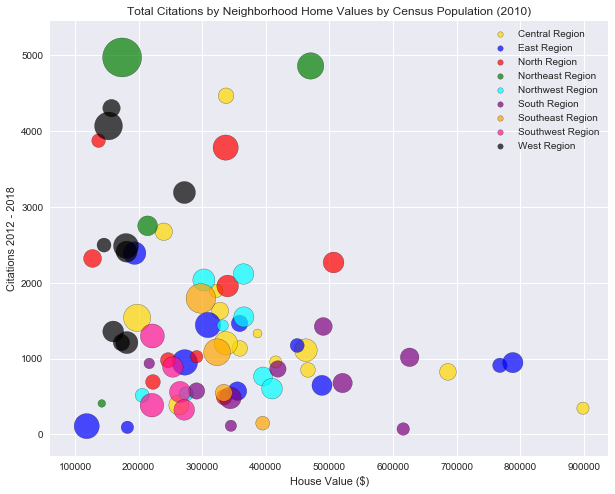

In [42]:
central_dataset  = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'Central']
east_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'East']
north_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'North']
northeast_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'Northeast']
northwest_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'Northwest']
south_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'South']
southeast_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'Southeast']
southwest_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'Southwest']
west_dataset = citations_by_neighborhood.loc[citations_by_neighborhood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))
#plt.scatter(Total Citations by Neighborhood Home Values by Census Population (2010))
central_plot = plt.scatter(central_dataset['House Value'], central_dataset['TOTAL_CITATIONS'], c='gold', s=central_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Central Region')
east_plot = plt.scatter(east_dataset['House Value'], east_dataset['TOTAL_CITATIONS'], c='blue', s=east_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='East Region')
north_plot = plt.scatter(north_dataset['House Value'], north_dataset['TOTAL_CITATIONS'], c='red', s=north_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='North Region')
northeast_plot = plt.scatter(northeast_dataset['House Value'], northeast_dataset['TOTAL_CITATIONS'], c='green', s=northeast_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Northeast Region')
nortwest_plot = plt.scatter(northwest_dataset['House Value'], northwest_dataset['TOTAL_CITATIONS'], c='cyan', s=northwest_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Northwest Region')
south_plot = plt.scatter(south_dataset['House Value'], south_dataset['TOTAL_CITATIONS'], c='purple', s=south_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='South Region')
southeast_plot = plt.scatter(southeast_dataset['House Value'], southeast_dataset['TOTAL_CITATIONS'], c='orange', s=southeast_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Southeast Region')
southwest_plot = plt.scatter(southwest_dataset['House Value'], southwest_dataset['TOTAL_CITATIONS'], c='deeppink', s=southwest_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='Southwest Region')
west_plot = plt.scatter(west_dataset['House Value'], west_dataset['TOTAL_CITATIONS'], c='black', s=west_dataset['POPULATION_2010']/20, alpha=.7, edgecolor='black', label='West Region')

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
plt.xlabel('House Value ($)')
plt.ylabel('Citations 2012 - 2018')
plt.title ('Total Citations by Neighborhood Home Values by Census Population (2010)')
plt.savefig('Total Citations by Neighborhood Home Values by Census Population (2010).png')
plt.show()

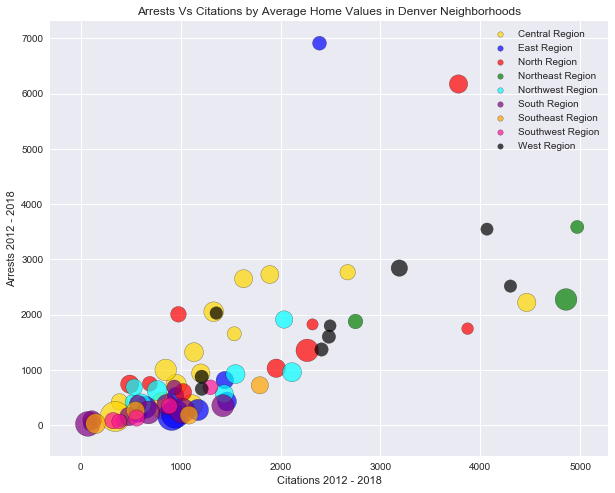

In [43]:
sns.set()
plt.figure(figsize=(10,8))
#plt.scatter(Arrests Vs Citations by Average Home Values in Denver Neighborhoods)
central_plot = plt.scatter(central_dataset['TOTAL_CITATIONS'], central_data['TOTAL_ARRESTS'], c='gold', s=central_data['House Value']/1000, alpha=.7, edgecolor='black', label='Central Region')
east_plot = plt.scatter(east_dataset['TOTAL_CITATIONS'], east_data['TOTAL_ARRESTS'], c='blue', s=east_data['House Value']/1000, alpha=.7, edgecolor='black', label='East Region')
north_plot = plt.scatter(north_dataset['TOTAL_CITATIONS'], north_data['TOTAL_ARRESTS'], c='red', s=north_data['House Value']/1000, alpha=.7, edgecolor='black', label='North Region')
northeast_plot = plt.scatter(northeast_dataset['TOTAL_CITATIONS'], northeast_data['TOTAL_ARRESTS'], c='green', s=northeast_data['House Value']/1000, alpha=.7, edgecolor='black', label='Northeast Region')
nortwest_plot = plt.scatter(northwest_dataset['TOTAL_CITATIONS'], northwest_data['TOTAL_ARRESTS'], c='cyan', s=northwest_data['House Value']/1000, alpha=.7, edgecolor='black', label='Northwest Region')
south_plot = plt.scatter(south_dataset['TOTAL_CITATIONS'], south_data['TOTAL_ARRESTS'], c='purple', s=south_data['House Value']/1000, alpha=.7, edgecolor='black', label='South Region')
southeast_plot = plt.scatter(southeast_dataset['TOTAL_CITATIONS'], southeast_data['TOTAL_ARRESTS'], c='orange', s=southeast_data['House Value']/1000, alpha=.7, edgecolor='black', label='Southeast Region')
southwest_plot = plt.scatter(southwest_dataset['TOTAL_CITATIONS'], southwest_data['TOTAL_ARRESTS'], c='deeppink', s=southwest_data['House Value']/1000, alpha=.7, edgecolor='black', label='Southwest Region')
west_plot = plt.scatter(west_dataset['TOTAL_CITATIONS'], west_data['TOTAL_ARRESTS'], c='black', s=west_data['House Value']/1000, alpha=.7, edgecolor='black', label='West Region')

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
plt.xlabel('Citations 2012 - 2018')
plt.ylabel('Arrests 2012 - 2018')
plt.title ('Arrests Vs Citations by Average Home Values in Denver Neighborhoods')
plt.savefig('Arrests Vs Citations by Average Home Values in Denver Neighborhoods.png')
plt.show()